In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('adult.csv')



## Data Exploration

In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30933 non-null  float64
 1   workclass       29305 non-null  object 
 2   fnlwgt          31910 non-null  float64
 3   education       32235 non-null  object 
 4   education-num   29956 non-null  float64
 5   marital-status  31584 non-null  object 
 6   occupation      27677 non-null  object 
 7   relationship    31259 non-null  object 
 8   race            32398 non-null  object 
 9   sex             32528 non-null  object 
 10  capital-gain    30607 non-null  float64
 11  capital-loss    30282 non-null  float64
 12  hours-per-week  29631 non-null  float64
 13  native-country  28654 non-null  object 
 14  income          31910 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [4]:
## removing of the ? as it is unknown value from the dataset
dataset.replace('?', np.nan, inplace=True)
dataset.replace(' ?', np.nan, inplace=True)
dataset.replace(' ', np.nan, inplace=True)
dataset.replace('', np.nan, inplace=True)
# dataset=dataset.to_csv('adult1.csv', index=False)
# dataset=pd.read_csv('adult.csv')

In [5]:
## Counting the missing values in each column
missing_values=dataset.isnull().sum()
missing_values

age               1628
workclass         4913
fnlwgt             651
education          326
education-num     2605
marital-status     977
occupation        6449
relationship      1302
race               163
sex                 33
capital-gain      1954
capital-loss      2279
hours-per-week    2930
native-country    4432
income             651
dtype: int64

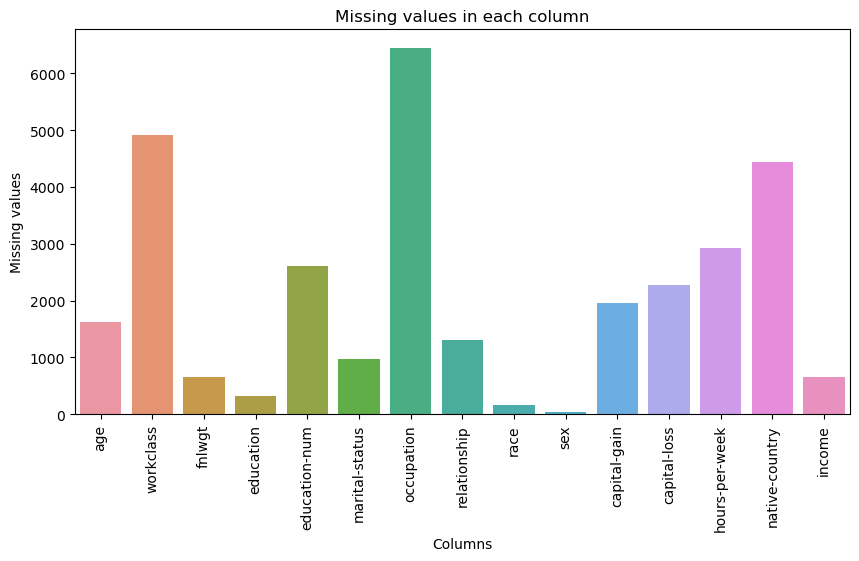

In [6]:
#plottting the missing values
plt.figure(figsize=(10,5))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing values')
plt.title('Missing values in each column')
plt.show()


<p>We can see that bargraph shows the major missing values in the dataset leading to inaccurate results for the models. </p>

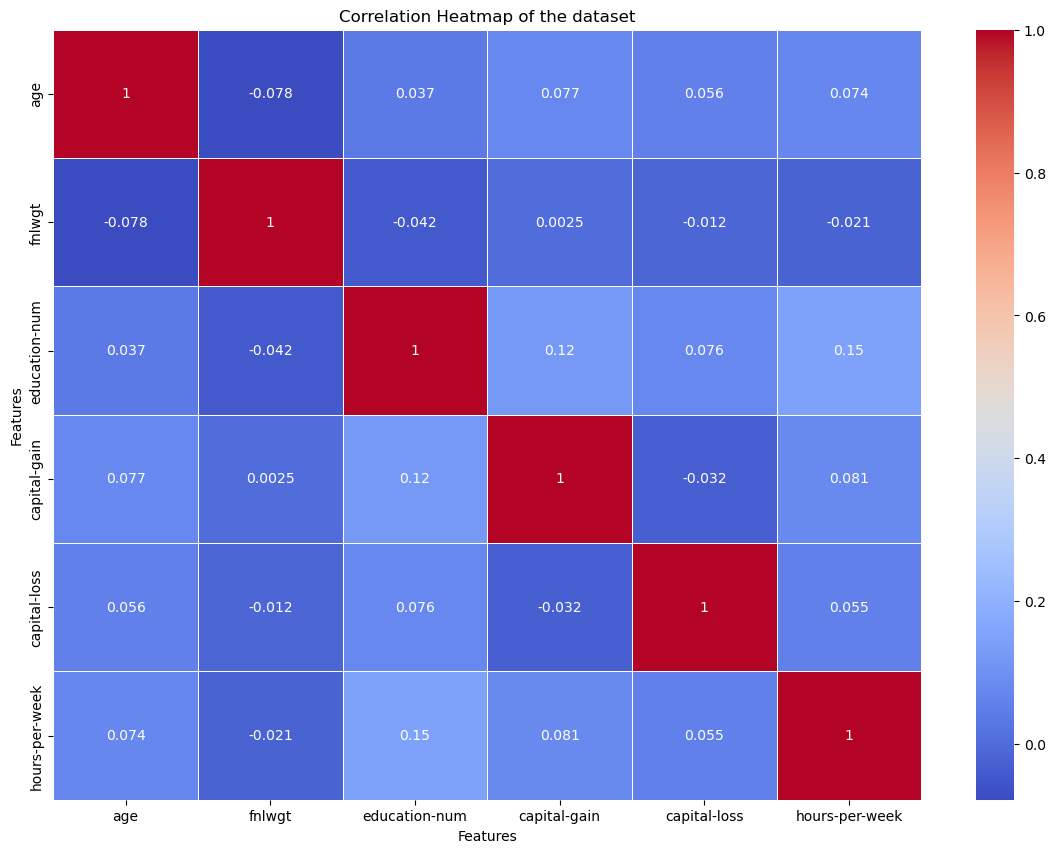

In [7]:
# showing the correlation between the numerical columns
numerical_cols=dataset.select_dtypes(exclude='object')
plt.figure(figsize=(14, 10))
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of the dataset')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

<p>By looking at the correlation heatmap (it shows different correlations between each columns of the dataset), we see that the highest correlation of this dataset is 0.15 between education_num and hours_per_week. Therefore, it indicates that higher education level tends to work more hours  </p>

<p>On the otherhand, we see that the lowest correlation of this dataset is -0.078 between age and fnlwgt, showing that there is no almost no correlation in this dataset. </p>

<p>
Furthermore, capital gain and education_num shows the positive correlation of 0.12, indicating that higher education levels are more likely to have more capital gains.
This suggests that a combination of multiple features is necessary to build an effective predictive model.
</p>


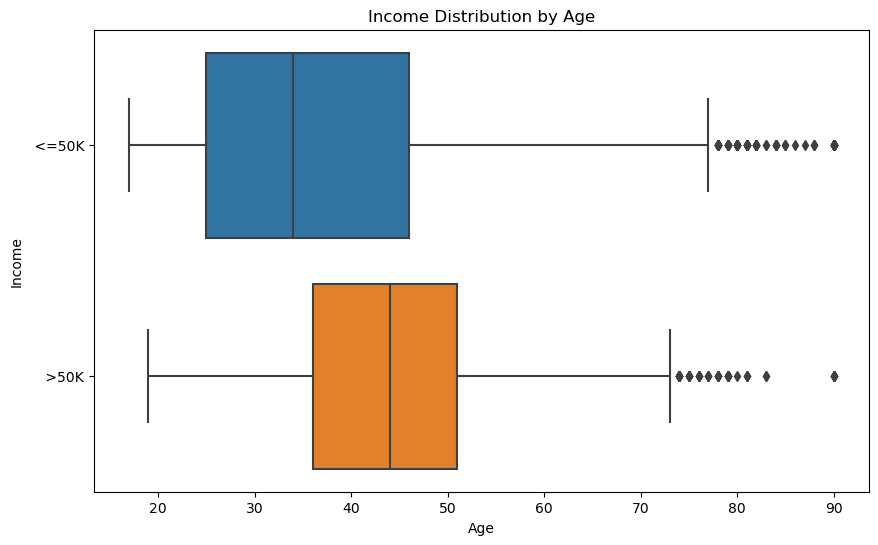

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='income', data=dataset)
plt.title('Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

<p>From this this box and whisker, we see the incomes varies with the age. 
Any person whose age is more than 40 are earning more than 50k as compared to other ages who are </p>

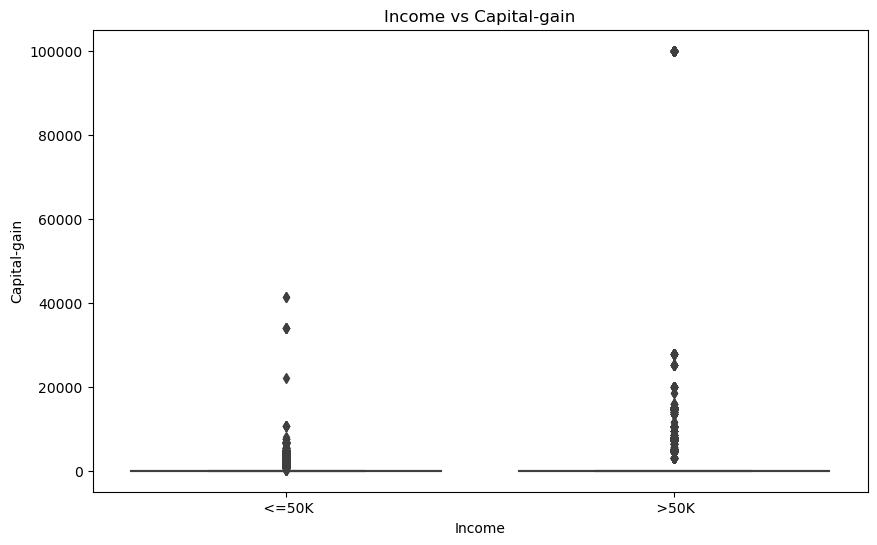

In [9]:
# Capital-gain
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital-gain', data=dataset)
plt.title('Income vs Capital-gain')
plt.xlabel('Income')
plt.ylabel('Capital-gain')
plt.show()



<p>
From this graph, we see that the population whoose earning is less than 50k has low captial gain as compared to the population who is making more than 50k has higher captial gain
</p>

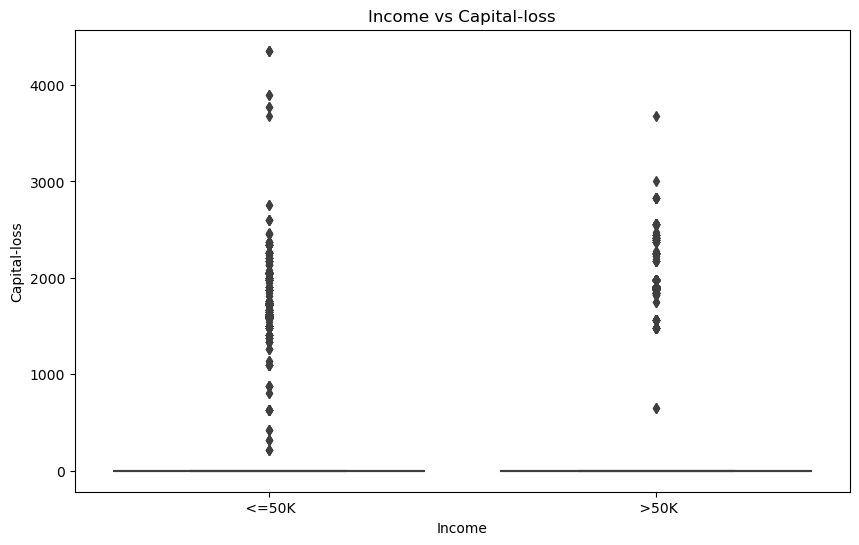

In [10]:
# Capital-loss
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital-loss', data=dataset)
plt.title('Income vs Capital-loss')
plt.xlabel('Income')
plt.ylabel('Capital-loss')
plt.show()

<p>
From this graph, it shows that both >50k and <=50k have a very similar capital loss and indicates that capital loss is not much of a classifier for income.
</p>

<p>

</p>

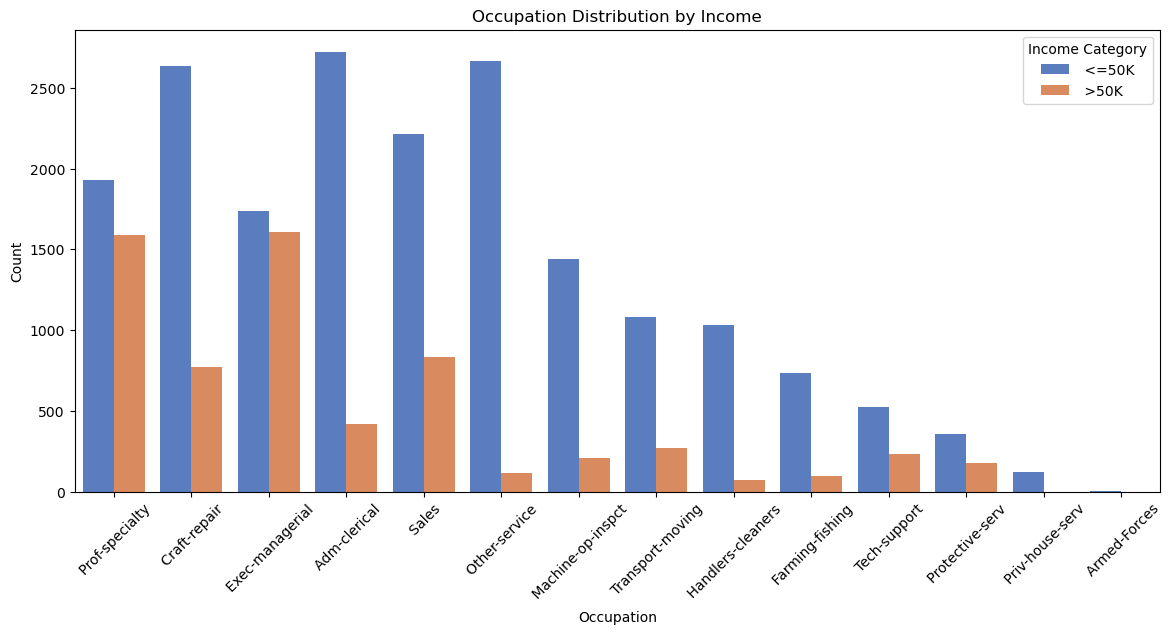

In [11]:
plt.figure(figsize=(14, 6))
sns.countplot(data=dataset, x="occupation", hue="income", palette="muted", order=dataset["occupation"].value_counts().index)
plt.title("Occupation Distribution by Income")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income Category")
plt.show()

<p>From this graph, we see that different occupations have different incomes. By looking at the Craft-repair, adm-clerical and other-servies have the highest income in " <=50k " category. Meanwhile, the Pro-specialty, Exec-managerial and Sales have the highest income in "> 50k " category. </p>

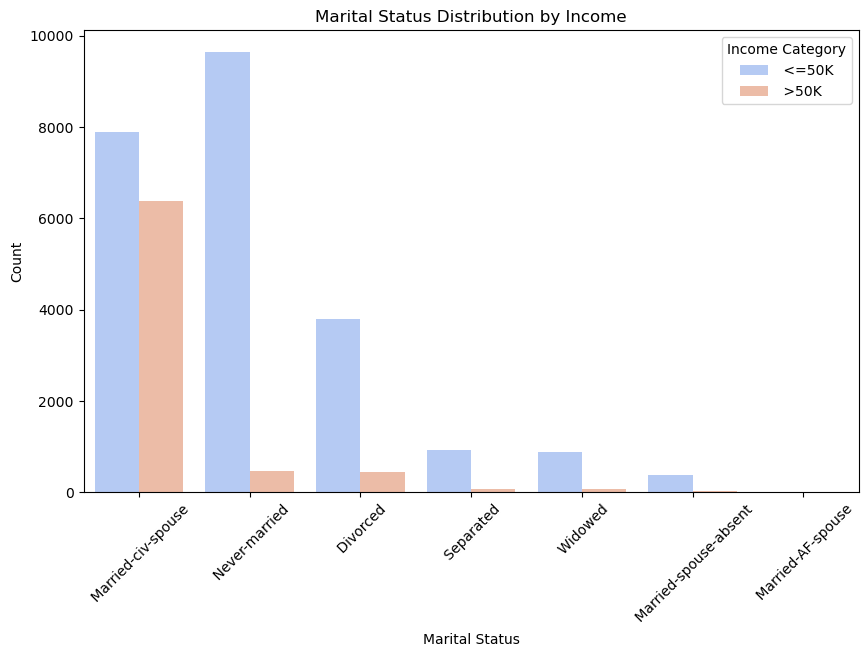

In [12]:
# Bar Chart for Marital Status Distribution by Income
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x="marital-status", hue="income", palette="coolwarm", order=dataset["marital-status"].value_counts().index)
plt.title("Marital Status Distribution by Income")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income Category")
plt.show()


<p>
From this graph, we see that highest count for the income of " <=50k " is Never-Married category. On the otherhand, Married-civ-spouse category has the highest count for the income of "> 50k".
Furthermore, this category makes a good income for both of its category(<=50k and >50k)
</p>

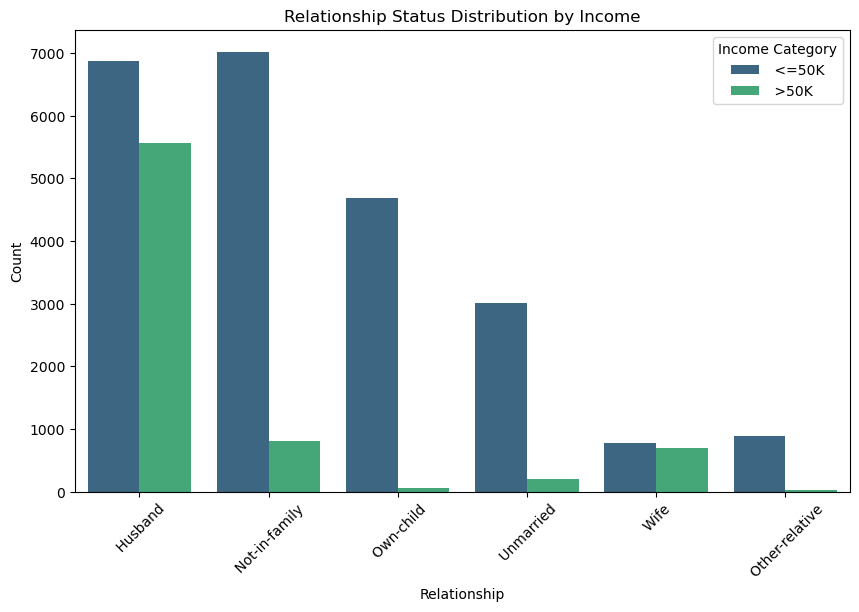

In [13]:
# Bar Chart for Relationship Distribution by Income
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x="relationship", hue="income", palette="viridis", order=dataset["relationship"].value_counts().index)
plt.title("Relationship Status Distribution by Income")
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income Category")
plt.show()

<p>
From this graph, Husbands form the largest group, with many earning <=50K, but a significant number also earn >50K. Meanwhile, those who are not-in-family category are making the highest income of "<=50k". Furthermore, Wives have a relatively balanced distribution compared to other groups, with a good portion earning >50K. 
</p>

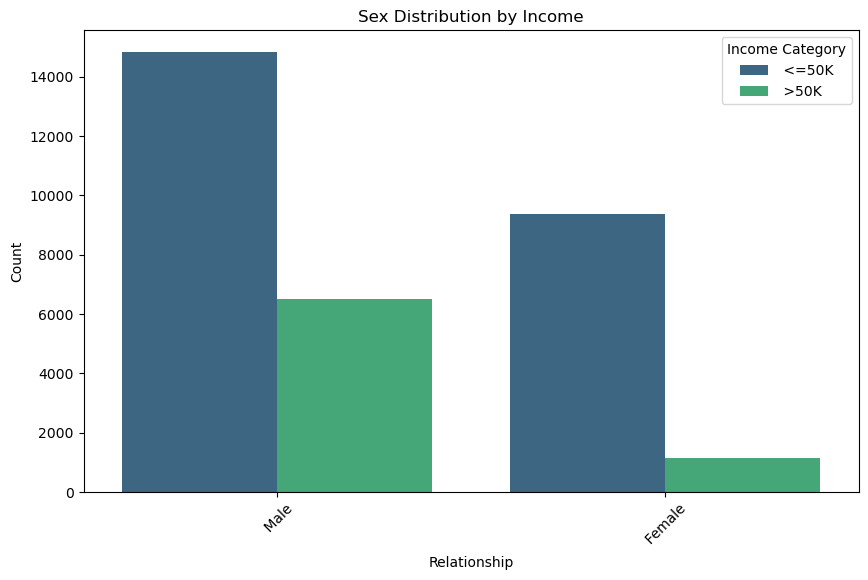

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x="sex", hue="income", palette="viridis", order=dataset["sex"].value_counts().index)
plt.title("Sex Distribution by Income")
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income Category")
plt.show()

<p>
From this graph, Males form the largest group, with many earning <=50K, but a significant number also earn >50K. Meanwhile, Females have a relatively smaller distribution compared to Males, with a good portion earning <=50K and a smaller portion earning >50K. This indicates a significant income disparity between the two genders, showing that Males have higher income in both categories.

</p>

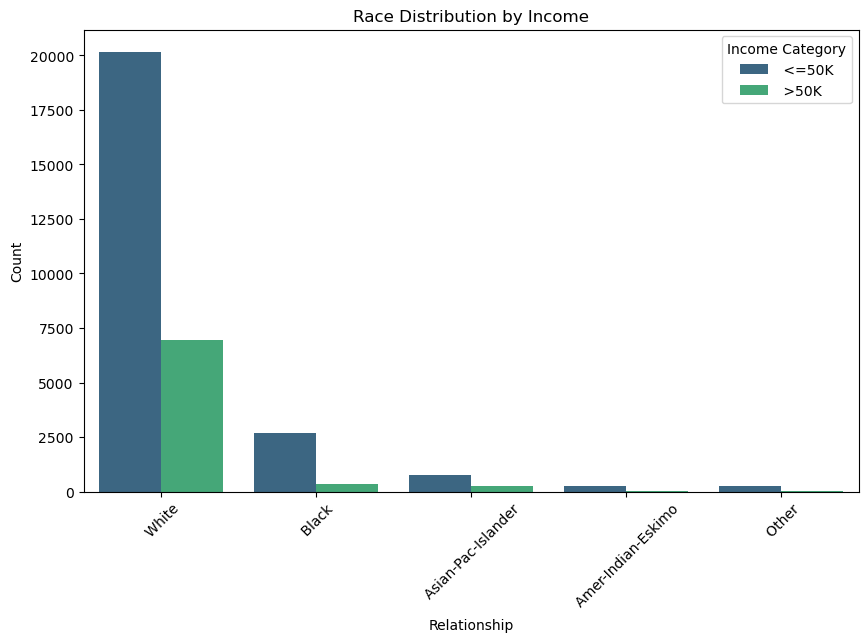

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x="race", hue="income", palette="viridis", order=dataset["race"].value_counts().index)
plt.title("Race Distribution by Income")
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income Category")
plt.show()

<p>
From this graph, Whites form the largest group, have with many earnings less than 50K, but a significant number also earn more than 50K. Meanwhile, Blacks have a relatively smaller distribution as compared to Whites, with a good portion earning ≤50K and a smaller portion earning >50K. Other racial groups such as Asian-Pac-Islander, Amer-Indian-Eskimo, and Others have even smaller representations, with most individuals earning ≤50K.
</p>

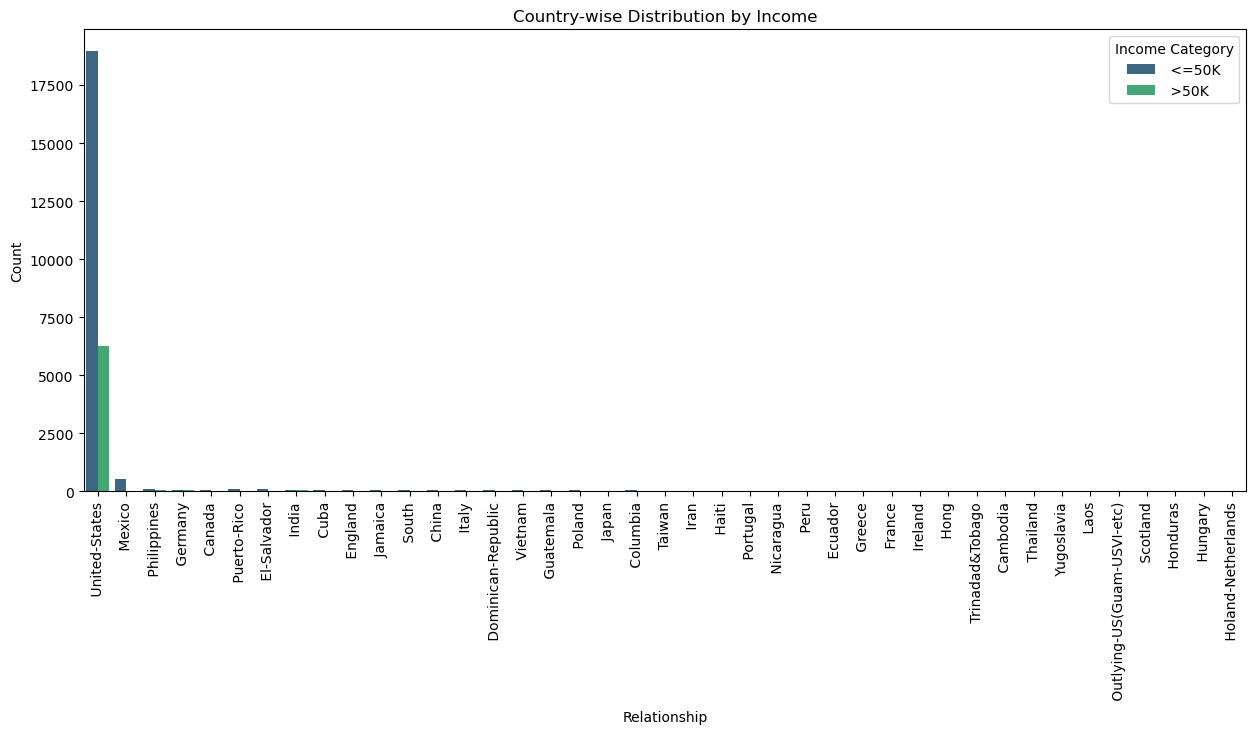

In [16]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset, x="native-country", hue="income", palette="viridis", order=dataset["native-country"].value_counts().index)
plt.title("Country-wise Distribution by Income")
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Income Category")
plt.show()

<p>
From the Graph, we see that the “United States” has the highest distribution than all other countries in the world. As it has significant number of earnings in respective to both more than and less than 50k. Meanwhile, Mexico has smaller distribution with most individuals having less than 50k and small portion are earning more than 50k. Other countries such as Canada, Germany, Philippines, Puerto-Rico and El-Salvador are earning less than 50k.
</p>

### Step 2 : Data Preprocessing

In [17]:
#1.2 Mean imputation
numerical_cols=dataset.select_dtypes(exclude='object')
dataset_mean=dataset.copy()
for column in numerical_cols:
    dataset_mean[column].fillna(dataset_mean[column].mean(),inplace=True)    
dataset_mean.isnull().sum()



age                  0
workclass         4913
fnlwgt               0
education          326
education-num        0
marital-status     977
occupation        6449
relationship      1302
race               163
sex                 33
capital-gain         0
capital-loss         0
hours-per-week       0
native-country    4432
income             651
dtype: int64

In [18]:
#1.3 Mod imputation for categorical columns
dataset_mod=dataset.copy()
categorical_cols=dataset.select_dtypes(include=[object]).columns
for column in numerical_cols:
    mode_value=dataset_mod[column].mode()[0]
    # print(column,mode_value)
    dataset_mod[column].fillna(mode_value,inplace=True)
dataset_mod.isnull().sum()

age                  0
workclass         4913
fnlwgt               0
education          326
education-num        0
marital-status     977
occupation        6449
relationship      1302
race               163
sex                 33
capital-gain         0
capital-loss         0
hours-per-week       0
native-country    4432
income             651
dtype: int64

In [19]:
def train_test_split_manual(X, y, test_size=0.2):
    test_size = 0.2  
    num_samples = X.shape[0]  
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    split_index = int(num_samples * (1 - test_size))
    train_indices, test_indices = indices[:split_index], indices[split_index:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

In [ ]:
def linear_regression_imputation(dataset_linear):
    for col in numerical_cols:
        if dataset_linear[col].isnull().sum() > 0:            
            best_correlated_column = correlation_matrix[col].sort_values(ascending=False).index[1]
            
            x = dataset_linear[best_correlated_column].values
            y = dataset_linear[col].values
            
            mask = ~np.isnan(x) & ~np.isnan(y)
            x = x[mask]
            y = y[mask]
            X = np.vstack([x, np.ones(len(x))]).T
            
            beta = np.linalg.inv(X.T @ X) @ X.T @ y
            missing_mask = dataset_linear[col].isnull()
            
            y_pred=beta[0] * dataset_linear.loc[missing_mask, best_correlated_column] + beta[1]
            dataset_linear.loc[missing_mask, col] = y_pred
    return dataset_linear

dataset_linear = dataset.copy()
dataset_linear = linear_regression_imputation(dataset_linear)
dataset_linear.dropna(inplace=True)
print(dataset_linear.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [21]:
# dataset_linear
# dataset_mean

#found the values of the missing values in the dataset

### Functions

In [22]:
def log_scaling_method(df):
    df_log = df.copy()
    for col in numerical_cols:
        df_log[col] = np.log1p(df_log[col])
    return df_log 

def robust_scaling_method(df):
    df_robust = df.copy()
    for col in numerical_cols:
        median = np.median(df_robust[col])
        iqr = np.percentile(df_robust[col], 75) - np.percentile(df_robust[col], 25)
        if iqr ==0:
            df_robust[col] = (df_robust[col] - median)
        else:
            df_robust[col] = (df_robust[col] - median) / iqr
    return df_robust


### Pipeline 1

In [23]:
##Linear Regression Imputation and  Log Scaling
dataset_linear_log_scaling = log_scaling_method(dataset_linear)
dataset_linear_log_scaling.head(41)


c:\Users\hassa\anaconda3\envs\pm3bap\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,3.688879,State-gov,11.258253,Bachelors,2.639057,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,4.810748,3.713572,United-States,<=50K
1,3.931826,Self-emp-not-inc,11.330348,Bachelors,2.325574,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,2.639057,United-States,<=50K
4,3.367296,Private,12.732013,Bachelors,2.639057,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,4.810748,3.713572,Cuba,<=50K
5,3.637586,Private,12.558780,Masters,2.404289,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.000000,3.713572,United-States,<=50K
7,3.970292,Self-emp-not-inc,12.253161,HS-grad,2.302585,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,3.828641,United-States,>50K
8,3.723362,Private,10.731646,Masters,2.708050,Never-married,Prof-specialty,Not-in-family,White,Female,9.552866,0.000000,3.931826,United-States,>50K
10,3.637586,Private,12.544204,Some-college,2.510578,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.000000,0.000000,4.394449,United-States,>50K
11,3.433987,State-gov,11.858626,Bachelors,2.639057,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.000000,0.000000,3.713572,India,>50K
12,3.178054,Private,11.714012,Bachelors,2.639057,Never-married,Adm-clerical,Own-child,White,Female,0.000000,0.000000,3.433987,United-States,<=50K
13,3.496508,Private,12.230863,Assoc-acdm,2.564949,Never-married,Sales,Not-in-family,Black,Male,0.000000,0.000000,3.931826,United-States,<=50K


### Pipeline 2

In [24]:
dataset_linear_log_robust = robust_scaling_method(dataset_linear)
dataset_linear_log_robust.head(41)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.052632,State-gov,-0.875277,Bachelors,1.000000,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,121.823475,0.000000,United-States,<=50K
1,0.631579,Self-emp-not-inc,-0.826096,Bachelors,-0.255818,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,-5.400000,United-States,<=50K
4,-0.526316,Private,1.338879,Bachelors,1.000000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,121.823475,0.000000,Cuba,<=50K
5,-0.052632,Private,0.882058,Masters,0.023518,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.000000,0.000000,United-States,<=50K
7,0.736842,Self-emp-not-inc,0.246055,HS-grad,-0.333333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,1.000000,United-States,>50K
8,0.126492,Private,-1.144607,Masters,1.333333,Never-married,Prof-specialty,Not-in-family,White,Female,14084.000000,0.000000,2.000000,United-States,>50K
10,-0.052632,Private,0.847110,Some-college,0.437348,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.000000,0.000000,8.000000,United-States,>50K
11,-0.421053,State-gov,-0.333978,Bachelors,1.000000,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.000000,0.000000,0.000000,India,>50K
12,-0.789474,Private,-0.495440,Bachelors,1.000000,Never-married,Adm-clerical,Own-child,White,Female,0.000000,0.000000,-2.000000,United-States,<=50K
13,-0.315789,Private,0.206820,Assoc-acdm,0.666667,Never-married,Sales,Not-in-family,Black,Male,0.000000,0.000000,2.000000,United-States,<=50K


### Pipeline 3

In [25]:
dataset_mean_log = log_scaling_method(dataset_mean)
dataset_mean_log.head(41)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,3.688879,State-gov,11.258253,Bachelors,2.639057,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,4.479978,3.713572,United-States,<=50K
1,3.931826,Self-emp-not-inc,11.330348,Bachelors,2.405161,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,2.639057,United-States,<=50K
2,3.663562,Private,12.281398,HS-grad,2.302585,Divorced,NaN,Not-in-family,White,Male,0.000000,0.000000,3.713572,United-States,<=50K
3,3.988984,Private,12.366157,11th,2.079442,Married-civ-spouse,NaN,Husband,Black,Male,0.000000,0.000000,3.713572,United-States,<=50K
4,3.367296,Private,12.732013,Bachelors,2.639057,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,4.479978,3.713572,Cuba,<=50K
5,3.637586,Private,12.558780,Masters,2.405161,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.000000,3.713572,United-States,<=50K
6,3.912023,NaN,11.984103,9th,1.791759,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.000000,2.833213,Jamaica,<=50K
7,3.970292,Self-emp-not-inc,12.253161,HS-grad,2.302585,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,3.828641,United-States,>50K
8,3.677448,Private,10.731646,Masters,2.708050,Never-married,Prof-specialty,Not-in-family,White,Female,9.552866,0.000000,3.931826,United-States,>50K
9,3.761200,Private,11.979486,Bachelors,2.639057,Married-civ-spouse,NaN,Husband,White,Male,8.552367,0.000000,3.713572,United-States,>50K


### Pipeline 4

In [26]:
dataset_mean_robust = robust_scaling_method(dataset_mean)
dataset_mean_robust.head(41)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.052632,State-gov,-0.883941,Bachelors,1.000000,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,87.232746,0.000000,United-States,<=50K
1,0.631579,Self-emp-not-inc,-0.834276,Bachelors,0.026739,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,-6.750000,United-States,<=50K
2,0.000000,Private,0.299875,HS-grad,-0.333333,Divorced,NaN,Not-in-family,White,Male,0.000000,0.000000,0.000000,United-States,<=50K
3,0.789474,Private,0.463353,11th,-1.000000,Married-civ-spouse,NaN,Husband,Black,Male,0.000000,0.000000,0.000000,United-States,<=50K
4,-0.526316,Private,1.351991,Bachelors,1.000000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,87.232746,0.000000,Cuba,<=50K
5,-0.052632,Private,0.890677,Masters,0.026739,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.000000,0.000000,United-States,<=50K
6,0.578947,NaN,-0.175426,9th,-1.666667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.000000,-6.000000,Jamaica,<=50K
7,0.736842,Self-emp-not-inc,0.248419,HS-grad,-0.333333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,1.250000,United-States,>50K
8,0.028702,Private,-1.155920,Masters,1.333333,Never-married,Prof-specialty,Not-in-family,White,Female,14084.000000,0.000000,2.500000,United-States,>50K
9,0.210526,Private,-0.181750,Bachelors,1.000000,Married-civ-spouse,NaN,Husband,White,Male,5178.000000,0.000000,0.000000,United-States,>50K


### Label Encoding

In [ ]:
def label_encode_column(column_values):
    unique_values, encoded_values = np.unique(column_values, return_inverse=True)
    encoding_dict = {value: index for index, value in enumerate(unique_values)}
    decoding_dict = {index: value for index, value in enumerate(unique_values)}
    return encoded_values, encoding_dict, decoding_dict

def encode_dataframe(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    encoding_info = {}
    
    for column in categorical_columns:
        encoded_values, encoding_dict, decoding_dict = label_encode_column(df[column].values)
        df[column] = encoded_values
        encoding_info[column] = {'encoding_dict': encoding_dict,'decoding_dict': decoding_dict}
        
        print(f"\n{column} Encoding and Decoding:")
        for enc, dec in decoding_dict.items():
            print(f"{enc} -> {dec}")
    return df
dataset_mean_robust.dropna(inplace=True)
dataset_linear_log_robust.dropna(inplace=True)
dataset_linear_log_scaling.dropna(inplace=True)
dataset_mean_log.dropna(inplace=True)

dataset_mean_robust.head(50)
dataset_mean_robust = encode_dataframe(dataset_mean_robust)
dataset_linear_log_robust = encode_dataframe(dataset_linear_log_robust)
dataset_linear_log_scaling = encode_dataframe(dataset_linear_log_scaling)
dataset_mean_log = encode_dataframe(dataset_mean_log)






workclass Encoding and Decoding:
0 ->  Federal-gov
1 ->  Local-gov
2 ->  Private
3 ->  Self-emp-inc
4 ->  Self-emp-not-inc
5 ->  State-gov
6 ->  Without-pay

education Encoding and Decoding:
0 ->  10th
1 ->  11th
2 ->  12th
3 ->  1st-4th
4 ->  5th-6th
5 ->  7th-8th
6 ->  9th
7 ->  Assoc-acdm
8 ->  Assoc-voc
9 ->  Bachelors
10 ->  Doctorate
11 ->  HS-grad
12 ->  Masters
13 ->  Preschool
14 ->  Prof-school
15 ->  Some-college

marital-status Encoding and Decoding:
0 ->  Divorced
1 ->  Married-AF-spouse
2 ->  Married-civ-spouse
3 ->  Married-spouse-absent
4 ->  Never-married
5 ->  Separated
6 ->  Widowed

occupation Encoding and Decoding:
0 ->  Adm-clerical
1 ->  Armed-Forces
2 ->  Craft-repair
3 ->  Exec-managerial
4 ->  Farming-fishing
5 ->  Handlers-cleaners
6 ->  Machine-op-inspct
7 ->  Other-service
8 ->  Priv-house-serv
9 ->  Prof-specialty
10 ->  Protective-serv
11 ->  Sales
12 ->  Tech-support
13 ->  Transport-moving

relationship Encoding and Decoding:
0 ->  Husband
1 ->  Not-in

In [28]:
# dataset_linear_log_scaling
# dataset_linear_log_robust.head(5)
#dataset_mean_log
dataset_mean_robust.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.052632,5,-0.883941,9,1.000000,4,0,1,4,1,2174.0,87.232746,0.00,38,0
1,0.631579,4,-0.834276,9,0.026739,2,3,0,4,1,0.0,0.000000,-6.75,38,0
4,-0.526316,2,1.351991,9,1.000000,2,9,5,2,0,0.0,87.232746,0.00,4,0
5,-0.052632,2,0.890677,12,0.026739,2,3,5,4,0,0.0,0.000000,0.00,38,0
7,0.736842,4,0.248419,11,-0.333333,2,3,0,4,1,0.0,0.000000,1.25,38,1


## Step_03: Model Training

### Linear Regression with L1 and L2 regulization

In [29]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, iterations=100, l1=False, l2=False, lambd=0.01):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1 = l1
        self.l2 = l2
        self.lambd = lambd
        self.W = None
        self.b = None
        self.iterations_list = []
        self.costs = []
    def sigmoid(self, z):
        z = np.clip(z, -100, 100)
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = X.shape[0]
        Z = np.dot(X, self.W) + self.b
        A = self.sigmoid(Z)
        A = np.clip(A, 1e-10, 1 - 1e-10)
        cost = (-1/m) * np.sum(y * np.log(np.maximum(A, 1e-15)) + (1 - y) * np.log(np.maximum(1 - A, 1e-15)))
        if self.l1:
            cost += (self.lambd / m) * np.sum(np.abs(self.W))
        if self.l2:
            cost += (self.lambd / (2 * m)) * np.sum(self.W**2)
        return cost

    def compute_gradients(self, X, y):
        m = X.shape[0]
        Z = np.dot(X, self.W) + self.b
        A = self.sigmoid(Z)
        dW = (1/m) * np.dot(X.T, (A - y))
        db = (1/m) * np.sum(A - y)
        if self.l1:
            dW += (self.lambd / m) * np.sign(self.W)
        if self.l2:
            dW += (self.lambd / m) * self.W
        return dW, db

    def fit(self, dataset):
        X=dataset.drop('income',axis=1)
        y=dataset['income']
        X_train, X_test, y_train, y_test = train_test_split_manual(X.values, y.values, test_size=0.2)
        self.W = np.zeros(X.shape[1])
        self.b = 0
        self.iterations_list = []
        for i in range(self.iterations):
            dW, db = self.compute_gradients(X_train, y_train)
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            if i % 10 == 0:
                cost = self.compute_cost(X_train, y_train)
                self.costs.append(cost)
                self.iterations_list.append(i)
                print(f"Iteration {i}, Cost: {cost}")
        return self.W, self.b, self.costs, self.iterations_list,y_test

    def predict(self, dataset):
        X=dataset.drop('income',axis=1)
        y=dataset['income']
        X_train, X_test, y_train, y_test = train_test_split_manual(X.values, y.values, test_size=0.2)
        Z = np.dot(X_test, self.W) + self.b
        A = self.sigmoid(Z)
        y_pred=(A >= 0.5).astype(int)
        accuracy = np.mean(y_pred == y_test)
        print(f"Accuracy: {accuracy * 100:.2f}%")
        return y_pred
    
    def plot_diagram(self):
        plt.plot(self.iterations_list, self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost vs Iterations')
        plt.show()
        
    
    def confusion_matrix(self,y_test,y_pred,check_print=False):
        true_postive = np.sum((y_test == 1) & (y_pred == 1))
        true_negative = np.sum((y_test == 0) & (y_pred == 0))
        false_postive = np.sum((y_test == 0) & (y_pred == 1))
        false_negative = np.sum((y_test == 1) & (y_pred == 0))
        if check_print:
            print(f"True Positive: {true_postive}")
            print(f"True Negative: {true_negative}")
            print(f"False Positive: {false_postive}")
            print(f"False Negative: {false_negative}")
        return true_postive,true_negative,false_postive,false_negative
    
    def Accuracy(self,y_test,y_pred):
        true_postive,true_negative,false_postive,false_negative=self.confusion_matrix(y_test,y_pred)
        accuracy = (true_postive + true_negative) / (true_postive + true_negative + false_postive + false_negative)
        print(f"Accuracy: {accuracy * 100:.2f}%")
        return accuracy
    def Precision(self,y_test,y_pred):
        true_postive,true_negative,false_postive,false_negative=self.confusion_matrix(y_test,y_pred)
        precision = true_postive / (true_postive + false_postive)
        print(f"Precision: {precision * 100:.2f}%")
        return precision
    
    def Recall(self,y_test,y_pred):
        true_postive,true_negative,false_postive,false_negative=self.confusion_matrix(y_test,y_pred)
        recall = true_postive / (true_postive + false_negative)
        print(f"Recall: {recall * 100:.2f}%")
        return recall
    
    def F1_Score(self,y_test,y_pred):
        precision=self.Precision(y_test,y_pred)
        recall=self.Recall(y_test,y_pred)
        f1_score = 2 * (precision * recall) / (precision + recall)
        print(f"F1 Score: {f1_score * 100:.2f}%")
        return f1_score

### Pipeline Model P1: Linear Regression Imputation + Log Scaling Logistic Regression (regularized L1)

Iteration 0, Cost: 0.6833513960111575
Iteration 10, Cost: 0.6206301567698905
Iteration 20, Cost: 0.5936272028342694
Iteration 30, Cost: 0.5814543631762141
Iteration 40, Cost: 0.5757098759789628
Iteration 50, Cost: 0.5728768847781356
Iteration 60, Cost: 0.5714103469726703
Iteration 70, Cost: 0.5706026461781526
Iteration 80, Cost: 0.5701190114299176
Iteration 90, Cost: 0.569797162753163
Iteration 100, Cost: 0.5695570130210924
Iteration 110, Cost: 0.5693585184569321
Iteration 120, Cost: 0.5691814660452924
Iteration 130, Cost: 0.5690155825866822
Iteration 140, Cost: 0.5688556206660033
Iteration 150, Cost: 0.5686988902093725
Iteration 160, Cost: 0.5685440084124335
Iteration 170, Cost: 0.5683902629372458
Iteration 180, Cost: 0.5682372861290829
Iteration 190, Cost: 0.5680848878342285
Iteration 200, Cost: 0.5679329694167635
Iteration 210, Cost: 0.567781479466482
Iteration 220, Cost: 0.5676303909572219
Iteration 230, Cost: 0.5674796894579939
Iteration 240, Cost: 0.567329367045326
Iteration 250,

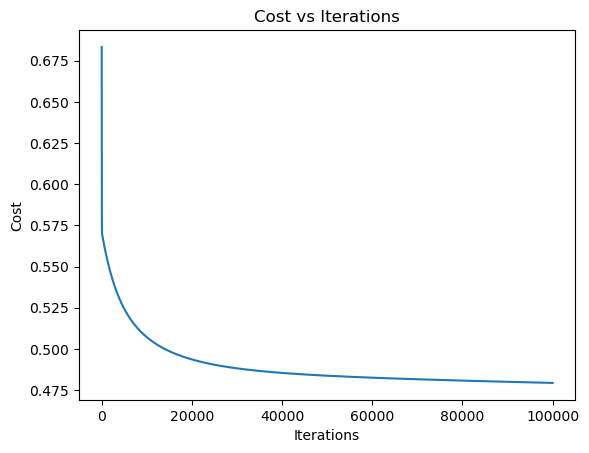

Accuracy: 69.88%
Precision: 26.33%
Recall: 10.94%
Precision: 26.33%
Recall: 10.94%
F1 Score: 15.46%
True Positive: 99
True Negative: 2414
False Positive: 277
False Negative: 806


(99, 2414, 277, 806)

In [30]:
P1_logistic_regression_L1=LogisticRegression(learning_rate=0.0001, iterations=100000, l1=True, l2=False,lambd=0.01)
_,_,_,_,y_test=P1_logistic_regression_L1.fit(dataset_linear_log_scaling)
y_pred=P1_logistic_regression_L1.predict(dataset_linear_log_scaling)
P1_logistic_regression_L1.plot_diagram()
P1_logistic_regression_L1.Accuracy(y_test,y_pred)
P1_logistic_regression_L1.Precision(y_test,y_pred)
P1_logistic_regression_L1.Recall(y_test,y_pred)
P1_logistic_regression_L1.F1_Score(y_test,y_pred)
P1_logistic_regression_L1.confusion_matrix(y_test,y_pred,check_print=True)



### P2: Linear Regression Imputation + Robust Scaling  Logistic Regression 


Iteration 0, Cost: 0.692866844801035
Iteration 10, Cost: 0.6791473622437125
Iteration 20, Cost: 0.6780794947215392
Iteration 30, Cost: 0.6770280875538023
Iteration 40, Cost: 0.6759877839156001
Iteration 50, Cost: 0.6749562262050348
Iteration 60, Cost: 0.6739323611161429
Iteration 70, Cost: 0.672915703209617
Iteration 80, Cost: 0.6719060145996957
Iteration 90, Cost: 0.6709031654826657
Iteration 100, Cost: 0.6699070733542403
Iteration 110, Cost: 0.6689176765023482
Iteration 120, Cost: 0.6679349224416633
Iteration 130, Cost: 0.6669587628655452
Iteration 140, Cost: 0.6659891514419941
Iteration 150, Cost: 0.6650260428510143
Iteration 160, Cost: 0.6640693923639648
Iteration 170, Cost: 0.6631191556595611
Iteration 180, Cost: 0.6621752887432156
Iteration 190, Cost: 0.6612377479114957
Iteration 200, Cost: 0.6603064897362787
Iteration 210, Cost: 0.659381471057494
Iteration 220, Cost: 0.6584626489796065
Iteration 230, Cost: 0.6575499808697222
Iteration 240, Cost: 0.6566434243563886
Iteration 250,

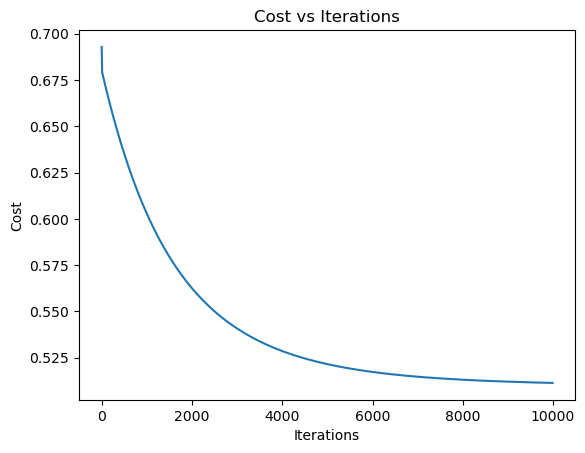

Accuracy: 70.63%
Precision: 24.68%
Recall: 8.54%
Precision: 24.68%
Recall: 8.54%
F1 Score: 12.69%


0.12685337726523888

In [31]:
P2_logistic_regression=LogisticRegression(learning_rate=0.000001, iterations=10000, l1=False, l2=False, lambd=0.01)
_,_,_,_,y_test=P2_logistic_regression.fit(dataset_linear_log_robust)
y_pred=P2_logistic_regression.predict(dataset_linear_log_robust)
P2_logistic_regression.plot_diagram()
P2_logistic_regression.Accuracy(y_test,y_pred)
P2_logistic_regression.Precision(y_test,y_pred)
P2_logistic_regression.Recall(y_test,y_pred)
P2_logistic_regression.F1_Score(y_test,y_pred)

### P3: Mean Imputation + Log Scaling Logistic Regression (regularized L2)

Iteration 0, Cost: 0.6833146938993776
Iteration 10, Cost: 0.6203079099835518
Iteration 20, Cost: 0.5931355635528531
Iteration 30, Cost: 0.5808644032477928
Iteration 40, Cost: 0.5750627482484449
Iteration 50, Cost: 0.5721962804800651
Iteration 60, Cost: 0.5707099481645806
Iteration 70, Cost: 0.5698903743980416
Iteration 80, Cost: 0.5693994539766473
Iteration 90, Cost: 0.5690729714362945
Iteration 100, Cost: 0.5688297162893805
Iteration 110, Cost: 0.5686289942769627
Iteration 120, Cost: 0.5684502174340148
Iteration 130, Cost: 0.5682828973392499
Iteration 140, Cost: 0.5681216637167179
Iteration 150, Cost: 0.5679637567264707
Iteration 160, Cost: 0.5678077541486204
Iteration 170, Cost: 0.5676529214805879
Iteration 180, Cost: 0.5674988786541116
Iteration 190, Cost: 0.5673454285848392
Iteration 200, Cost: 0.5671924687739968
Iteration 210, Cost: 0.5670399456571742
Iteration 220, Cost: 0.5668878310016711
Iteration 230, Cost: 0.5667361096935537
Iteration 240, Cost: 0.5665847734146964
Iteration 2

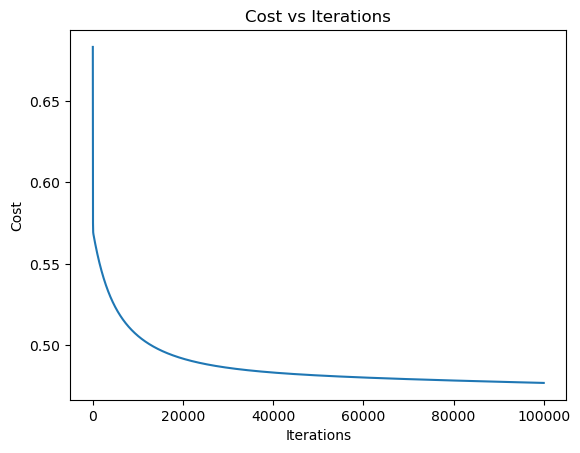

Accuracy: 69.24%
Precision: 23.97%
Recall: 10.11%
Precision: 23.97%
Recall: 10.11%
F1 Score: 14.22%
True Positive: 93
True Negative: 2433
False Positive: 295
False Negative: 827


(93, 2433, 295, 827)

In [32]:
P3_logistic_regression_L2=LogisticRegression(learning_rate=0.0001, iterations=100000, l1=False, l2=True, lambd=0.001)
_,_,_,_,y_test=P3_logistic_regression_L2.fit(dataset_mean_log)
y_pred=P3_logistic_regression_L2.predict(dataset_mean_log)
P3_logistic_regression_L2.plot_diagram()
P3_logistic_regression_L2.Accuracy(y_test,y_pred)
P3_logistic_regression_L2.Precision(y_test,y_pred)
P3_logistic_regression_L2.Recall(y_test,y_pred)
P3_logistic_regression_L2.F1_Score(y_test,y_pred)
P3_logistic_regression_L2.confusion_matrix(y_test,y_pred,check_print=True)


### P4: Mean Imputation + Robust Scaling Logistic Regression

Iteration 0, Cost: 0.6938484875418717
Iteration 10, Cost: 0.6807376778525787
Iteration 20, Cost: 0.6796627844805102
Iteration 30, Cost: 0.6786016796341656
Iteration 40, Cost: 0.6775505880044763
Iteration 50, Cost: 0.6765078273004932
Iteration 60, Cost: 0.6754726326489846
Iteration 70, Cost: 0.6744446416800101
Iteration 80, Cost: 0.6734236688205714
Iteration 90, Cost: 0.6724096062818913
Iteration 100, Cost: 0.6714023805965734
Iteration 110, Cost: 0.670401933530633
Iteration 120, Cost: 0.6694082136973409
Iteration 130, Cost: 0.6684211728717395
Iteration 140, Cost: 0.6674407643705316
Iteration 150, Cost: 0.6664669423396412


Iteration 160, Cost: 0.6654996614407319
Iteration 170, Cost: 0.6645388767130908
Iteration 180, Cost: 0.6635845435126002
Iteration 190, Cost: 0.6626366174845895
Iteration 200, Cost: 0.661695054551568
Iteration 210, Cost: 0.6607598109074931
Iteration 220, Cost: 0.6598308430148961
Iteration 230, Cost: 0.6589081076032536
Iteration 240, Cost: 0.6579915616678959
Iteration 250, Cost: 0.6570811624691401
Iteration 260, Cost: 0.6561768675315074
Iteration 270, Cost: 0.6552786346429723
Iteration 280, Cost: 0.6543864218542107
Iteration 290, Cost: 0.6535001874778377
Iteration 300, Cost: 0.652619890087634
Iteration 310, Cost: 0.651745488517754
Iteration 320, Cost: 0.650876941861918
Iteration 330, Cost: 0.6500142094725878
Iteration 340, Cost: 0.6491572509601271
Iteration 350, Cost: 0.6483060261919453
Iteration 360, Cost: 0.6474604952916256
Iteration 370, Cost: 0.6466206186380395
Iteration 380, Cost: 0.6457863568644461
Iteration 390, Cost: 0.6449576708575772
Iteration 400, Cost: 0.6441345217567097
Iter

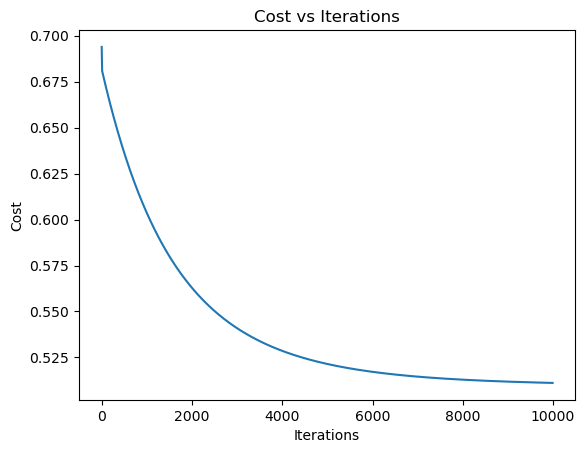

Accuracy: 69.74%
Precision: 28.39%
Recall: 9.31%
Precision: 28.39%
Recall: 9.31%
F1 Score: 14.02%
True Positive: 90
True Negative: 2454
False Positive: 227
False Negative: 877


(90, 2454, 227, 877)

In [33]:
P4_Logistic_regression=LogisticRegression(learning_rate=0.000001, iterations=10000, l1=False, l2=False, lambd=0.01)
_,_,_,_,y_test=P4_Logistic_regression.fit(dataset_mean_robust)
y_pred=P4_Logistic_regression.predict(dataset_mean_robust)
P4_Logistic_regression.plot_diagram()
P4_Logistic_regression.Accuracy(y_test,y_pred)
P4_Logistic_regression.Precision(y_test,y_pred)
P4_Logistic_regression.Recall(y_test,y_pred)
P4_Logistic_regression.F1_Score(y_test,y_pred)
P4_Logistic_regression.confusion_matrix(y_test,y_pred,check_print=True)


### Starting with SVM

In [34]:
class SVM:
    def __init__(self, learning_rate=0.01, lamba=0.01):
        self.lamba = lamba
        self.learning_rate = learning_rate
        self.w = None
        self.b = None
        self.L1=None
        self.L2=None
        
    def fit(self, X, y,L1=False, L2=False,iteration=100,learning_rate=0.01,lamba=0.01):
        self.iterations=iteration
        self.learning_rate=learning_rate
        self.lamba=lamba
        self.L1=L1
        self.L2=L2
        
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        for i in range(self.iterations):
            y_ = np.where(y <= 0, -1, 1)
            for i, x in enumerate(X):
                if y_[i] * (np.dot(x, self.w) - self.b) >= 1:
                    dw = np.zeros_like(self.w)
                    db = 0
                else:
                    dw = -np.dot(x, y_[i])
                    db = y_[i]
                if self.L2:
                    dw += 2 * self.lamba * self.w
                if self.L1:
                    dw += self.lamba * np.sign(self.w)
                    
                self.w = self.w - self.learning_rate * dw
                self.b = self.b - self.learning_rate * db

    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        return np.where(np.sign(output) <= -1, 0, 1)


    
    def confusion_matrix(self,y_test,y_pred,check_print=False):
        true_postive = np.sum((y_test == 1) & (y_pred == 1))
        true_negative = np.sum((y_test == 0) & (y_pred == 0))
        false_postive = np.sum((y_test == 0) & (y_pred == 1))
        false_negative = np.sum((y_test == 1) & (y_pred == 0))
        if check_print:
            print(f"True Positive: {true_postive}")
            print(f"True Negative: {true_negative}")
            print(f"False Positive: {false_postive}")
            print(f"False Negative: {false_negative}")
        return true_postive,true_negative,false_postive,false_negative
    
    def Accuracy(self,y_test,y_pred):
        true_postive,true_negative,false_postive,false_negative=self.confusion_matrix(y_test,y_pred)
        accuracy = (true_postive + true_negative) / (true_postive + true_negative + false_postive + false_negative)
        print(f"Accuracy: {accuracy * 100:.2f}%")
        return accuracy
    def Precision(self,y_test,y_pred):
        true_postive,true_negative,false_postive,false_negative=self.confusion_matrix(y_test,y_pred)
        precision = true_postive / (true_postive + false_postive)
        print(f"Precision: {precision * 100:.2f}%")
        return precision
    
    def Recall(self,y_test,y_pred):
        true_postive,true_negative,false_postive,false_negative=self.confusion_matrix(y_test,y_pred)
        recall = true_postive / (true_postive + false_negative)
        print(f"Recall: {recall * 100:.2f}%")
        return recall
    
    def F1_Score(self,y_test,y_pred):
        precision=self.Precision(y_test,y_pred)
        recall=self.Recall(y_test,y_pred)
        f1_score = 2 * (precision * recall) / (precision + recall)
        print(f"F1 Score: {f1_score * 100:.2f}%")
        return f1_score
    
        
    
    
    


### P1: Linear Regression Imputation + Log Scaling SVM (regularized L1)

Accuracy: 78.81%
Precision: 64.98%
Recall: 34.07%
Precision: 64.98%
Recall: 34.07%
F1 Score: 44.70%
True Positive: 308
True Negative: 2526
False Positive: 166
False Negative: 596


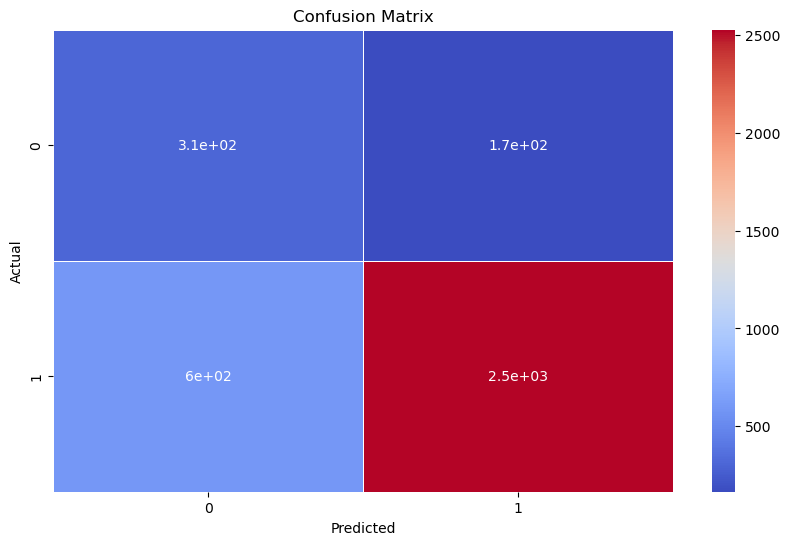

In [45]:
P1_SVM_Log = SVM()
X = dataset_linear_log_scaling.drop('income', axis=1).values
y = dataset_linear_log_scaling['income'].values
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2)
P1_SVM_Log.fit(X_train,y_train,L1=True,L2=False,iteration=1000,learning_rate=0.001,lamba=0.01)
y_pred = P1_SVM_Log.predict(X_test)
P1_SVM_Log.Accuracy(y_test, y_pred)
P1_SVM_Log.Precision(y_test, y_pred)
P1_SVM_Log.Recall(y_test, y_pred)
P1_SVM_Log.F1_Score(y_test, y_pred)
true_postive,true_negative,false_postive,false_negative=P1_SVM_Log.confusion_matrix(y_test, y_pred, check_print=True)

plt.figure(figsize=(10, 6))
sns.heatmap([[true_postive,false_postive],[false_negative,true_negative]], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




### P2: Linear Regression Imputation + Robust Scaling SVM

Accuracy: 76.23%
Precision: 52.06%
Recall: 64.16%
Precision: 52.06%
Recall: 64.16%
F1 Score: 57.48%
True Positive: 580
True Negative: 2171
False Positive: 534
False Negative: 324


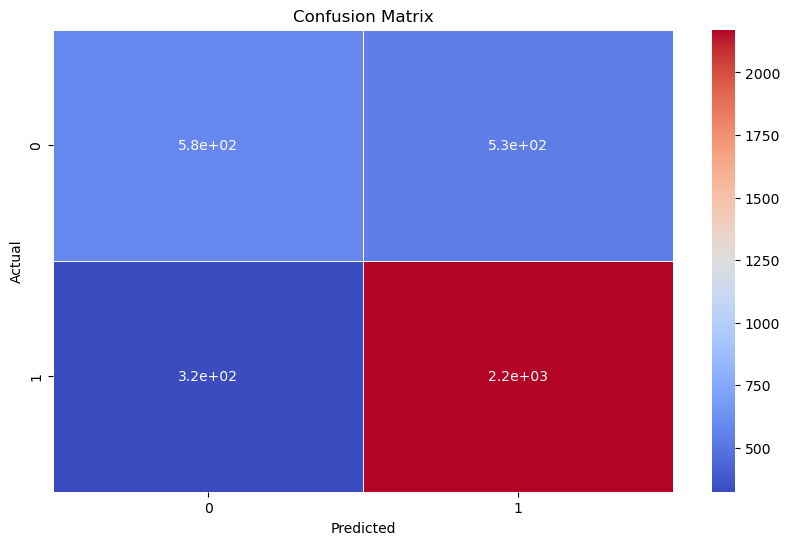

In [44]:
P2_SVM_Robust = SVM()
X = dataset_linear_log_robust.drop('income', axis=1).values
y = dataset_linear_log_robust['income'].values
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2)
P2_SVM_Robust.fit(X_train,y_train,L1=False,L2=False,iteration=1000,learning_rate=0.001,lamba=0.01)
y_pred = P2_SVM_Robust.predict(X_test)
P2_SVM_Robust.Accuracy(y_test, y_pred)
P2_SVM_Robust.Precision(y_test, y_pred)
P2_SVM_Robust.Recall(y_test, y_pred)
P2_SVM_Robust.F1_Score(y_test, y_pred)
true_postive,true_negative,false_postive,false_negative=P2_SVM_Robust.confusion_matrix(y_test, y_pred, check_print=True)
plt.figure(figsize=(10, 6))
sns.heatmap([[true_postive,false_postive],[false_negative,true_negative]], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### P3: Mean Imputation + Log Scaling SVM (regularized L2)

Accuracy: 76.95%
Precision: 74.36%
Recall: 15.49%
Precision: 74.36%
Recall: 15.49%
F1 Score: 25.64%
True Positive: 145
True Negative: 2662
False Positive: 50
False Negative: 791


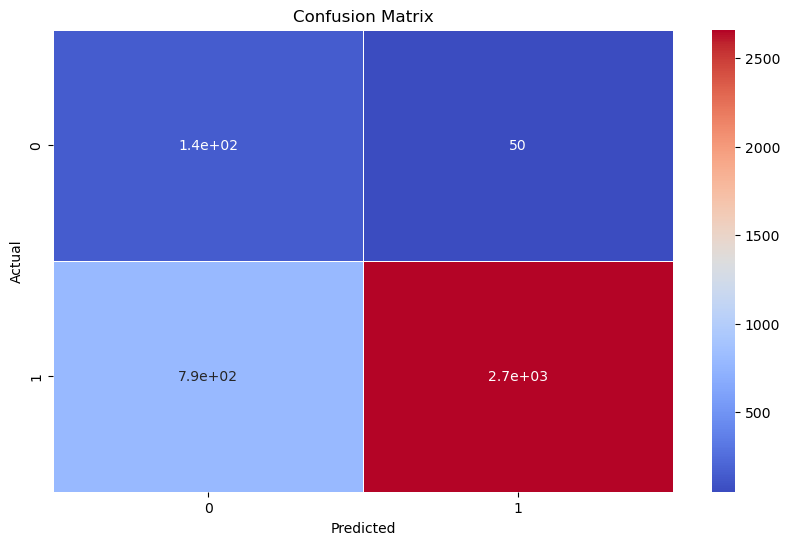

In [56]:
P3_SVM_MEAN_LOG = SVM()
X = dataset_mean_log.drop('income', axis=1).values
y = dataset_mean_log['income'].values
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2)
P3_SVM_MEAN_LOG.fit(X_train,y_train,L1=False,L2=True,iteration=100,learning_rate=0.0001,lamba=0.01)
y_pred = P3_SVM_MEAN_LOG.predict(X_test)
P3_SVM_MEAN_LOG.Accuracy(y_test, y_pred)
P3_SVM_MEAN_LOG.Precision(y_test, y_pred)
P3_SVM_MEAN_LOG.Recall(y_test, y_pred)
P3_SVM_MEAN_LOG.F1_Score(y_test, y_pred)
true_postive,true_negative,false_postive,false_negative=P3_SVM_MEAN_LOG.confusion_matrix(y_test, y_pred, check_print=True)
plt.figure(figsize=(10, 6))
sns.heatmap([[true_postive,false_postive],[false_negative,true_negative]], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### P4: Mean Imputation + Robust Scaling SVM

Accuracy: 75.27%
Precision: 49.62%
Recall: 59.17%
Precision: 49.62%
Recall: 59.17%
F1 Score: 53.98%
True Positive: 529
True Negative: 2217
False Positive: 537
False Negative: 365


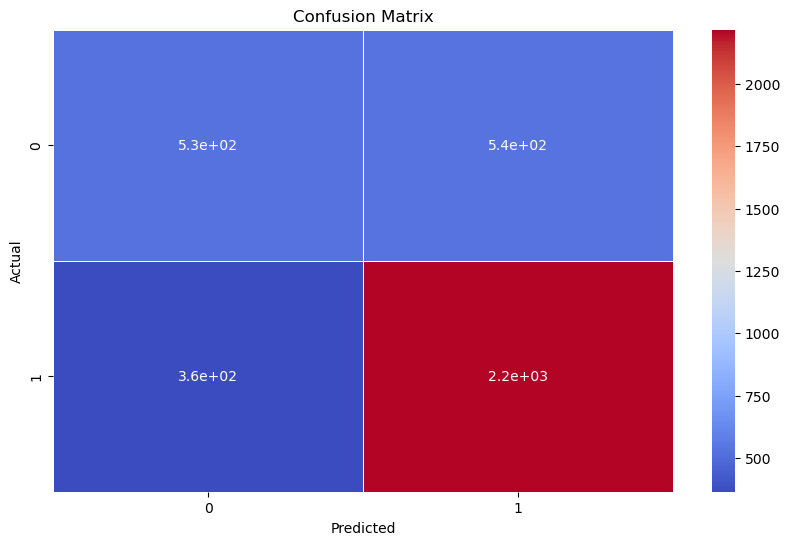

In [62]:
P4_SVM_MEAN_ROBUST = SVM()
X = dataset_mean_robust.drop('income', axis=1).values
y = dataset_mean_robust['income'].values
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2)
P4_SVM_MEAN_ROBUST.fit(X_train,y_train,L1=False,L2=False,iteration=100,learning_rate=0.0001,lamba=0.01)
predictions = P4_SVM_MEAN_ROBUST.predict(X_test)
P4_SVM_MEAN_ROBUST.Accuracy(y_test, predictions)
P4_SVM_MEAN_ROBUST.Precision(y_test, predictions)
P4_SVM_MEAN_ROBUST.Recall(y_test, predictions)
P4_SVM_MEAN_ROBUST.F1_Score(y_test, predictions)
true_postive,true_negative,false_postive,false_negative=P4_SVM_MEAN_ROBUST.confusion_matrix(y_test, predictions, check_print=True)

plt.figure(figsize=(10, 6))
sns.heatmap([[true_postive,false_postive],[false_negative,true_negative]], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()